<a href="https://colab.research.google.com/github/srzarin/AtoZgeospatialsolutions/blob/master/Detectron2_WareHouseDressCodeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [How to train Detectron2 with Custom COCO Datasets](https://www.dlology.com/blog/how-to-train-detectron2-with-custom-coco-datasets/) | DLology

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

This notebook will help you get started with this framwork by training a instance segmentation model with your custom COCO datasets.

# Install detectron2

In [ ]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.6.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.7.0+cu101)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-xm8jmnh5
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-xm8jmnh5
     |████████████████████████████████| 276kB 4.8MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2-cp36-none-any.whl size=47852 sha256=98fafbed73729fa24b719cc79a0f3b9180dd1b626f38274e1ab90434e2e3b17a
  Stored in directory: /tmp/pip-ephem-wheel-cache-nkbmotey/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=2a099f41a07bb3ecec1237bc741260031d7726fe59004ae48bcc78e5197adb1e
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully

'1.6.0+cu101'

In [ ]:
pip install imgaug==0.2.6 

     |████████████████████████████████| 634kB 3.4MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=4c4e2d6b5e83fee86094b7580ca07a346f787edabd08a3014e57af34b28e3a26
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 7268 (delta 9), reused 14 (delta 7), pack-reused 7232
Receiving objects: 100% (7268/7268), 3.37 MiB | 17.62 MiB/s, done.
Resolving deltas: 100% (5144/5144), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 2.2MB 3.4MB/s 
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Running setup.py develop for detectron2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2 import model_zoo

In [ ]:
!unzip WareHouse

Archive:  WareHouse.zip
   creating: WareHouse/
  inflating: WareHouse/README.roboflow.txt  
   creating: WareHouse/test/
  inflating: WareHouse/test/annotations_test.json  
  inflating: WareHouse/test/wh_dresscode_0007_jpg.rf.607cd7889b2878cce4a7c52f88e9e534.jpg  
  inflating: WareHouse/test/wh_dresscode_0011_jpg.rf.577c6d2f5135c3baac82ed36cbdb9429.jpg  
  inflating: WareHouse/test/wh_dresscode_0035_jpg.rf.8bbb469d06d99d0af1f471814287d7a0.jpg  
  inflating: WareHouse/test/wh_dresscode_0042_jpg.rf.c23ccf7acb880cd1bc6f9a51eba44e0f.jpg  
  inflating: WareHouse/test/wh_dresscode_0043_jpg.rf.b2d48384c4dbddb4ef7be852d7ae25df.jpg  
  inflating: WareHouse/test/wh_dresscode_0061_jpg.rf.e5c4252361e09b178d6705618de4883c.jpg  
  inflating: WareHouse/test/wh_dresscode_0083_jpg.rf.58ae0c1763cf5a79e75b609308203c72.jpg  
  inflating: WareHouse/test/wh_dresscode_0086_jpg.rf.6d335d881e11726c70ecc460e8e7dcd3.jpg  
  inflating: WareHouse/test/wh_dresscode_0088_jpg.rf.0f948f572d63822c43fc6cd133cec3e9.jpg 

In [ ]:
cd .. 


/


In [ ]:
!pwd

/


In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_data_train", {}, "/content/WareHouse/train/annotations_train.json", "/content/WareHouse/train")
register_coco_instances("my_data_val", {}, "/content/WareHouse/valid/annotations_test.json", "/content/WareHouse/valid")
register_coco_instances("my_data_test", {}, "/content/WareHouse/test/annotations_valid.json", "/content/WareHouse/test")

In [ ]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_data_train")
dataset_dicts = DatasetCatalog.get("my_data_train")

WARNING [10/05 18:54:50 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/05 18:54:50 d2.data.datasets.coco]: Loaded 2335 images in COCO format from /content/WareHouse/train/annotations_train.json


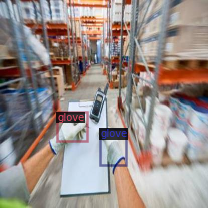

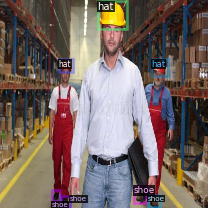

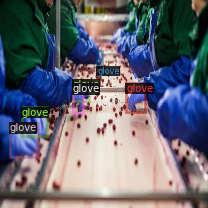

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_data_train",)
cfg.DATASETS.TEST = ( )

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1500
cfg.SOLVER.MAX_ITER = 1200 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1200)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[10/05 19:53:39 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (7, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (7,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (24, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (24,) in the model! You might want to double check if this is expected.


[10/05 19:53:39 d2.engine.train_loop]: Starting training from iteration 0
[10/05 19:54:06 d2.utils.events]:  eta: 0:25:07  iter: 19  total_loss: 2.882  loss_cls: 1.924  loss_box_reg: 0.611  loss_rpn_cls: 0.1636  loss_rpn_loc: 0.02029  time: 1.2895  data_time: 0.0181  lr: 1.3654e-05  max_mem: 5449M
[10/05 19:54:31 d2.utils.events]:  eta: 0:24:44  iter: 39  total_loss: 2.439  loss_cls: 1.69  loss_box_reg: 0.5864  loss_rpn_cls: 0.1713  loss_rpn_loc: 0.03248  time: 1.2819  data_time: 0.0051  lr: 2.6974e-05  max_mem: 5449M
[10/05 19:54:57 d2.utils.events]:  eta: 0:24:20  iter: 59  total_loss: 2.307  loss_cls: 1.29  loss_box_reg: 0.6547  loss_rpn_cls: 0.1304  loss_rpn_loc: 0.02155  time: 1.2792  data_time: 0.0046  lr: 4.0294e-05  max_mem: 5449M
[10/05 19:55:21 d2.utils.events]:  eta: 0:23:05  iter: 79  total_loss: 2.044  loss_cls: 1.017  loss_box_reg: 0.7682  loss_rpn_cls: 0.1563  loss_rpn_loc: 0.03163  time: 1.2584  data_time: 0.0049  lr: 5.3614e-05  max_mem: 5449M
[10/05 19:55:46 d2.utils.

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

<IPython.core.display.Javascript object>

Then, we randomly select several samples to visualize the prediction results.

In [ ]:
# cfg already contains everything we've set previously. Now we changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

WARNING [10/05 20:34:31 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/05 20:34:31 d2.data.datasets.coco]: Loaded 2335 images in COCO format from /content/WareHouse/train/annotations_train.json


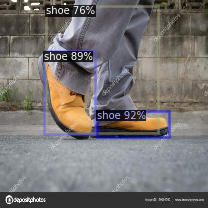

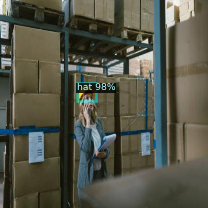

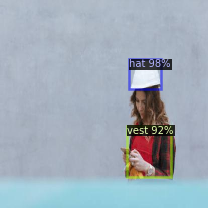

In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("my_data_train")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=my_dataset_train_metadata,
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_data_train", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_data_train")
print(inference_on_dataset(trainer.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

WARNING [10/05 20:36:34 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/05 20:36:34 d2.data.datasets.coco]: Loaded 2335 images in COCO format from /content/WareHouse/train/annotations_train.json
[10/05 20:36:34 d2.data.common]: Serializing 2335 elements to byte tensors and concatenating them all ...
[10/05 20:36:35 d2.data.common]: Serialized dataset takes 0.87 MiB
[10/05 20:36:35 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/05 20:36:35 d2.evaluation.evaluator]: Start inference on 2335 images
[10/05 20:36:37 d2.evaluation.evaluator]: Inference done 11/2335. 0.2327 s / img. ETA=0:09:03
[10/05 20:36:43 d2.evaluation.evaluator]: Inference done 33/2335. 0.2338 s / img. ETA=0:09:02
[10/05 20:36:48 d2.evaluation.evaluator]: Inference done 55/2335. 0.2341 s / img. ETA=0:08:57
[10/05 20:36:53 d2.evaluatio

model_final_a6e10b.pkl: 237MB [00:09, 24.1MB/s]                           


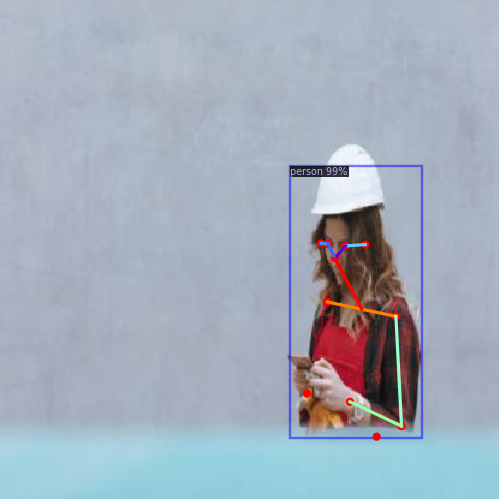

In [ ]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# Install dependencies, download the video, and crop 5 seconds for processing
!pip install youtube-dl
!pip uninstall -y opencv-python-headless opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
!youtube-dl https://www.youtube.com/watch?v=iWKu6WNFf9M -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy video-clip.mp4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-opencv is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
[youtube] iWKu6WNFf9M: Downloading webpage
[download] Destination: video.mp4
[download] 100% of 60.35MiB in 00:01
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libo